# Augmented Data Comparison

In this notebook, different ways to compare the quality of augmented time series are explored.

## 0 Imports and static variables

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

# own classes
from utils.utils import load_time_series, plot_time_series_attribute, plot_multiple_time_series_attributes, slice_years, maximum_mean_discrepancy
from data_augmentation_methods.algorithmic.brownian_motion import brownian_motion

In [4]:
DATA_FOLDER = Path("./data")
MULTIVARIATE_DATA_FOLDER = DATA_FOLDER / "multivariate"
UNIVARIATE_DATA_FOLDER = DATA_FOLDER / "univariate"

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## 1 Loading data

In [6]:
nvda_ohlcav = load_time_series(UNIVARIATE_DATA_FOLDER / "NVDA_open_high_low_close_adjClose_volume.csv")
nvda_ohlcav.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-05,389.089996,395.649994,387.070007,391.709991,391.584412,39609400
1,2023-06-06,388.299988,391.600006,381.480011,386.540009,386.416077,38872900
2,2023-06-07,389.149994,394.989990,373.559998,374.750000,374.668610,51199800
3,2023-06-08,377.239990,388.640015,375.049988,385.100006,385.016388,41777200
4,2023-06-09,390.369995,397.109985,385.670013,387.700012,387.615814,42722000


In [7]:
aapl_ohlcav = load_time_series(UNIVARIATE_DATA_FOLDER / "AAPL_open_high_low_close_adjClose_volume.csv")
aapl_ohlcav.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


## 2 Plot Data

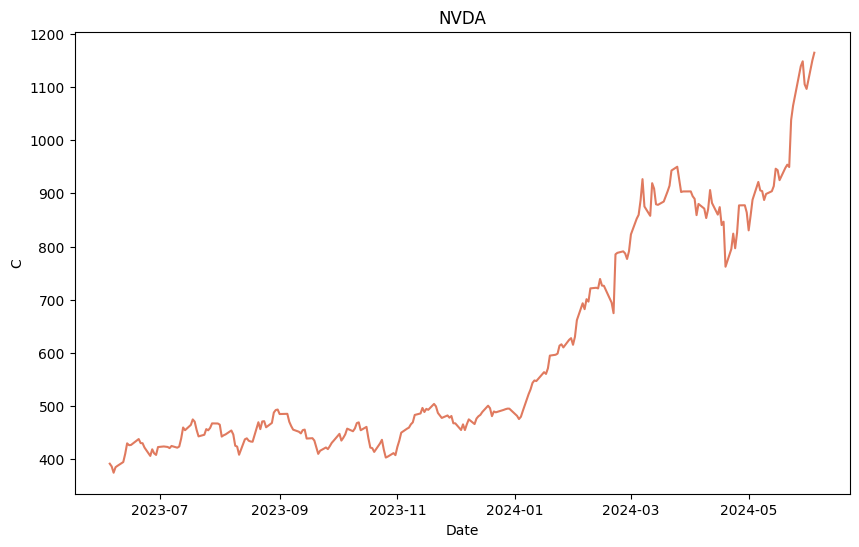

In [8]:
plot_time_series_attribute(df=nvda_ohlcav, title="NVDA")

In [9]:
# get only data between 2020-2024
aapl_ohlcav_20_24 = slice_years(df=aapl_ohlcav, years=["2020", "2024"])

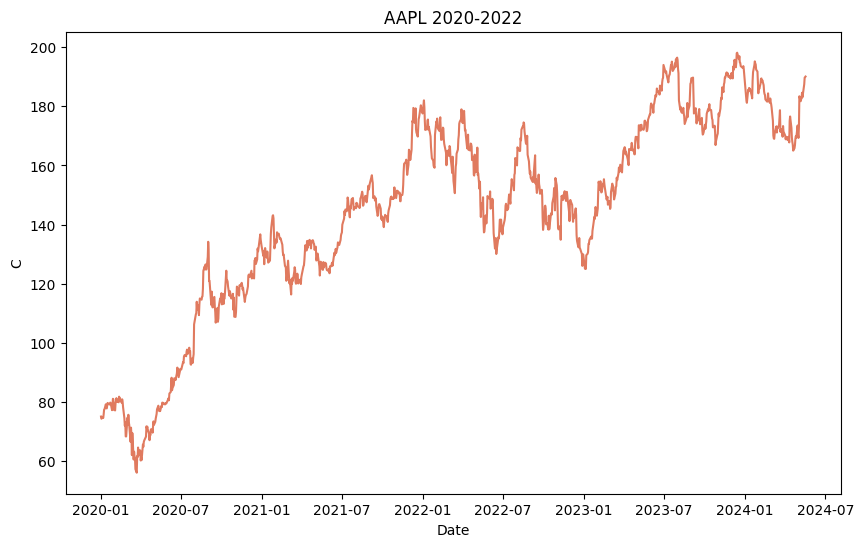

In [10]:
plot_time_series_attribute(aapl_ohlcav_20_24, "AAPL 2020-2022")

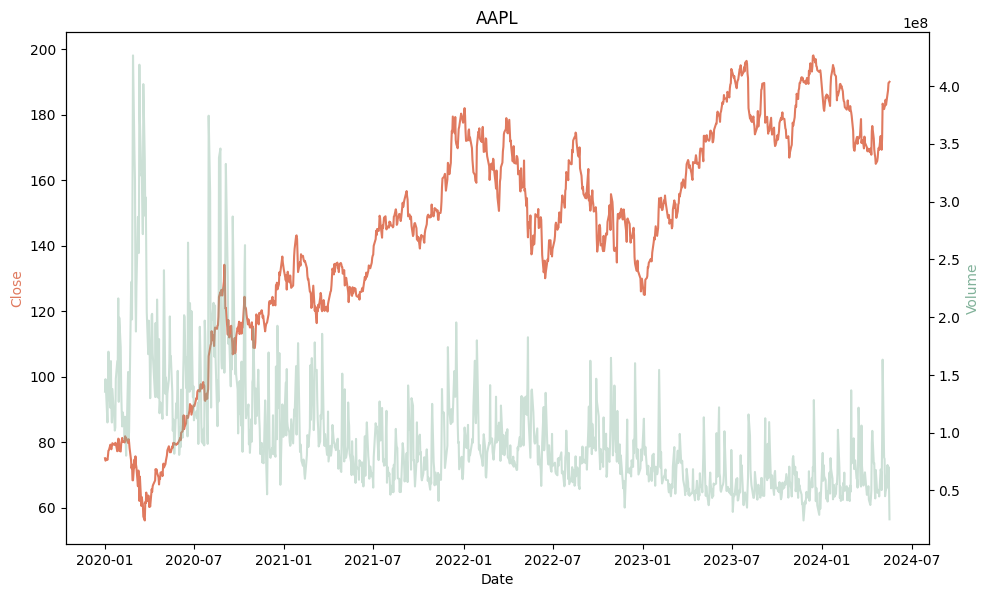

In [11]:
plot_multiple_time_series_attributes(aapl_ohlcav_20_24, "AAPL")

## 3 Brownian Motion

In [12]:
aapl_c = aapl_ohlcav[['Date','Close']]
aapl_c.head()

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


In [15]:
asdf = brownian_motion(aapl_c)

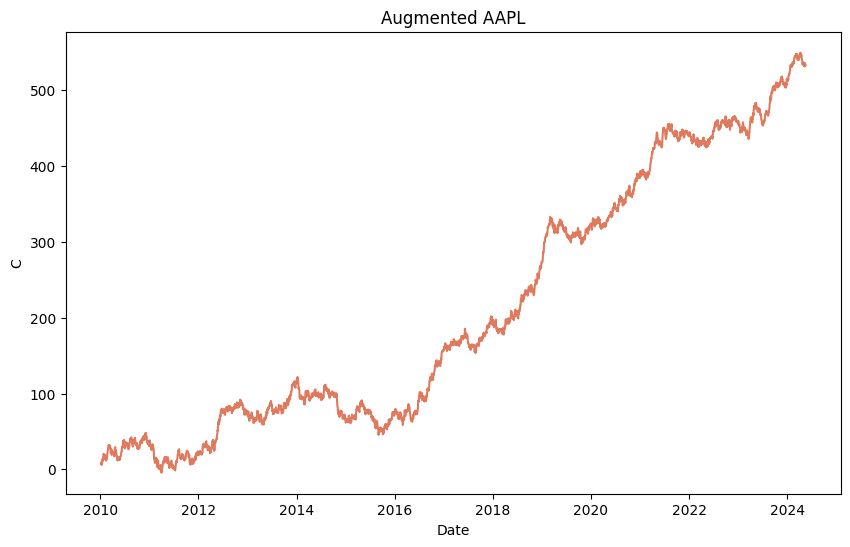

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,8.565795
2,2010-01-06,8.085516
3,2010-01-07,8.962544
4,2010-01-08,7.654740


In [16]:
plot_time_series_attribute(asdf, title="Augmented AAPL")
asdf.head()

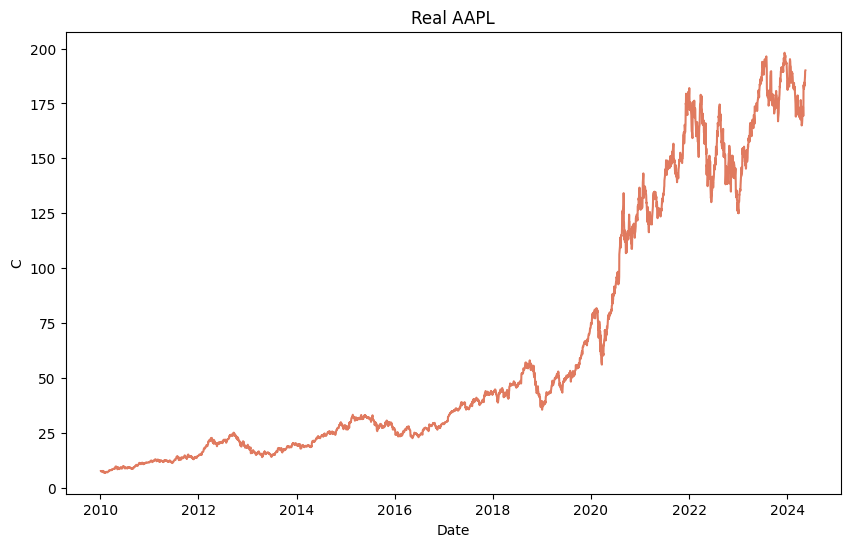

In [17]:
plot_time_series_attribute(aapl_c, title="Real AAPL")

## 4 MMD
compares distributions of 2 datasets

In [25]:
aapl_c['Close'].values.reshape(-1, 1)

array([[  7.643214],
       [  7.656429],
       [  7.534643],
       ...,
       [189.720001],
       [189.839996],
       [190.054993]])

In [26]:
aapl_c['Close'].values
0.02483545965327188
-0.0005527915975677214

-0.0005527915975677214

In [ ]:
# hi